<a href="https://colab.research.google.com/github/Mgobeaalcoba/Exploration_Data_Analyst/blob/main/24_Analisis_exploratorio_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción

EDA 


1. Analizando el Vino
1. Modelo y evaluación
1. Siguientes pasos

In [1]:
# 
url_wine_red='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/winequality-red.csv'
url_wine_white='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/winequality-white.csv'

In [2]:
import pandas as pd 

In [3]:
red=pd.read_csv(url_wine_red,delimiter=";")

In [4]:
white=pd.read_csv(url_wine_white,delimiter=";")

In [5]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red['category']='red'
white['category']='white'

In [7]:
#unir las variablesresult = 
total_wine=red.append(white, ignore_index=True)

In [8]:
total_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
category                 object
dtype: object

In [9]:
total_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


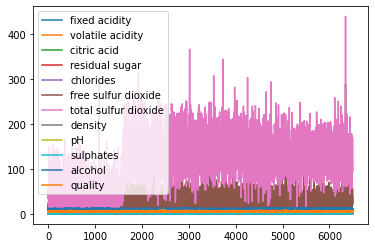

In [10]:
total_wine.plot()

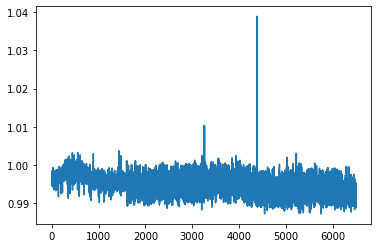

In [11]:
total_wine['density'].plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


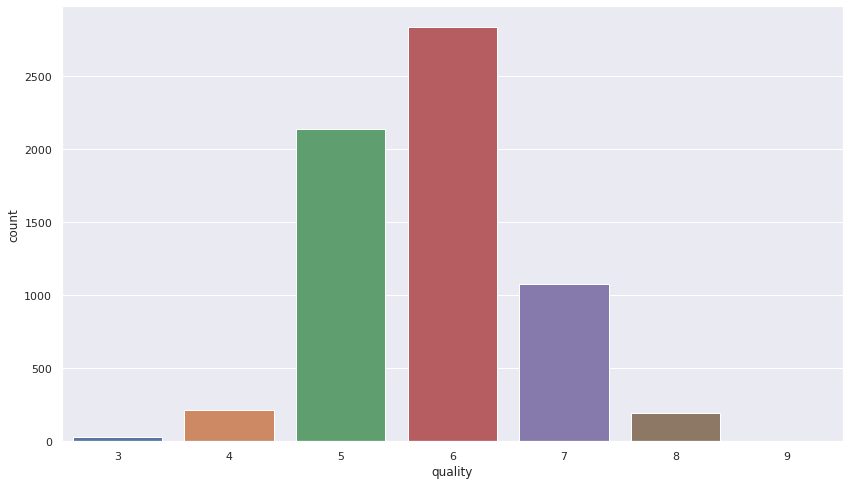

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(total_wine['quality'])

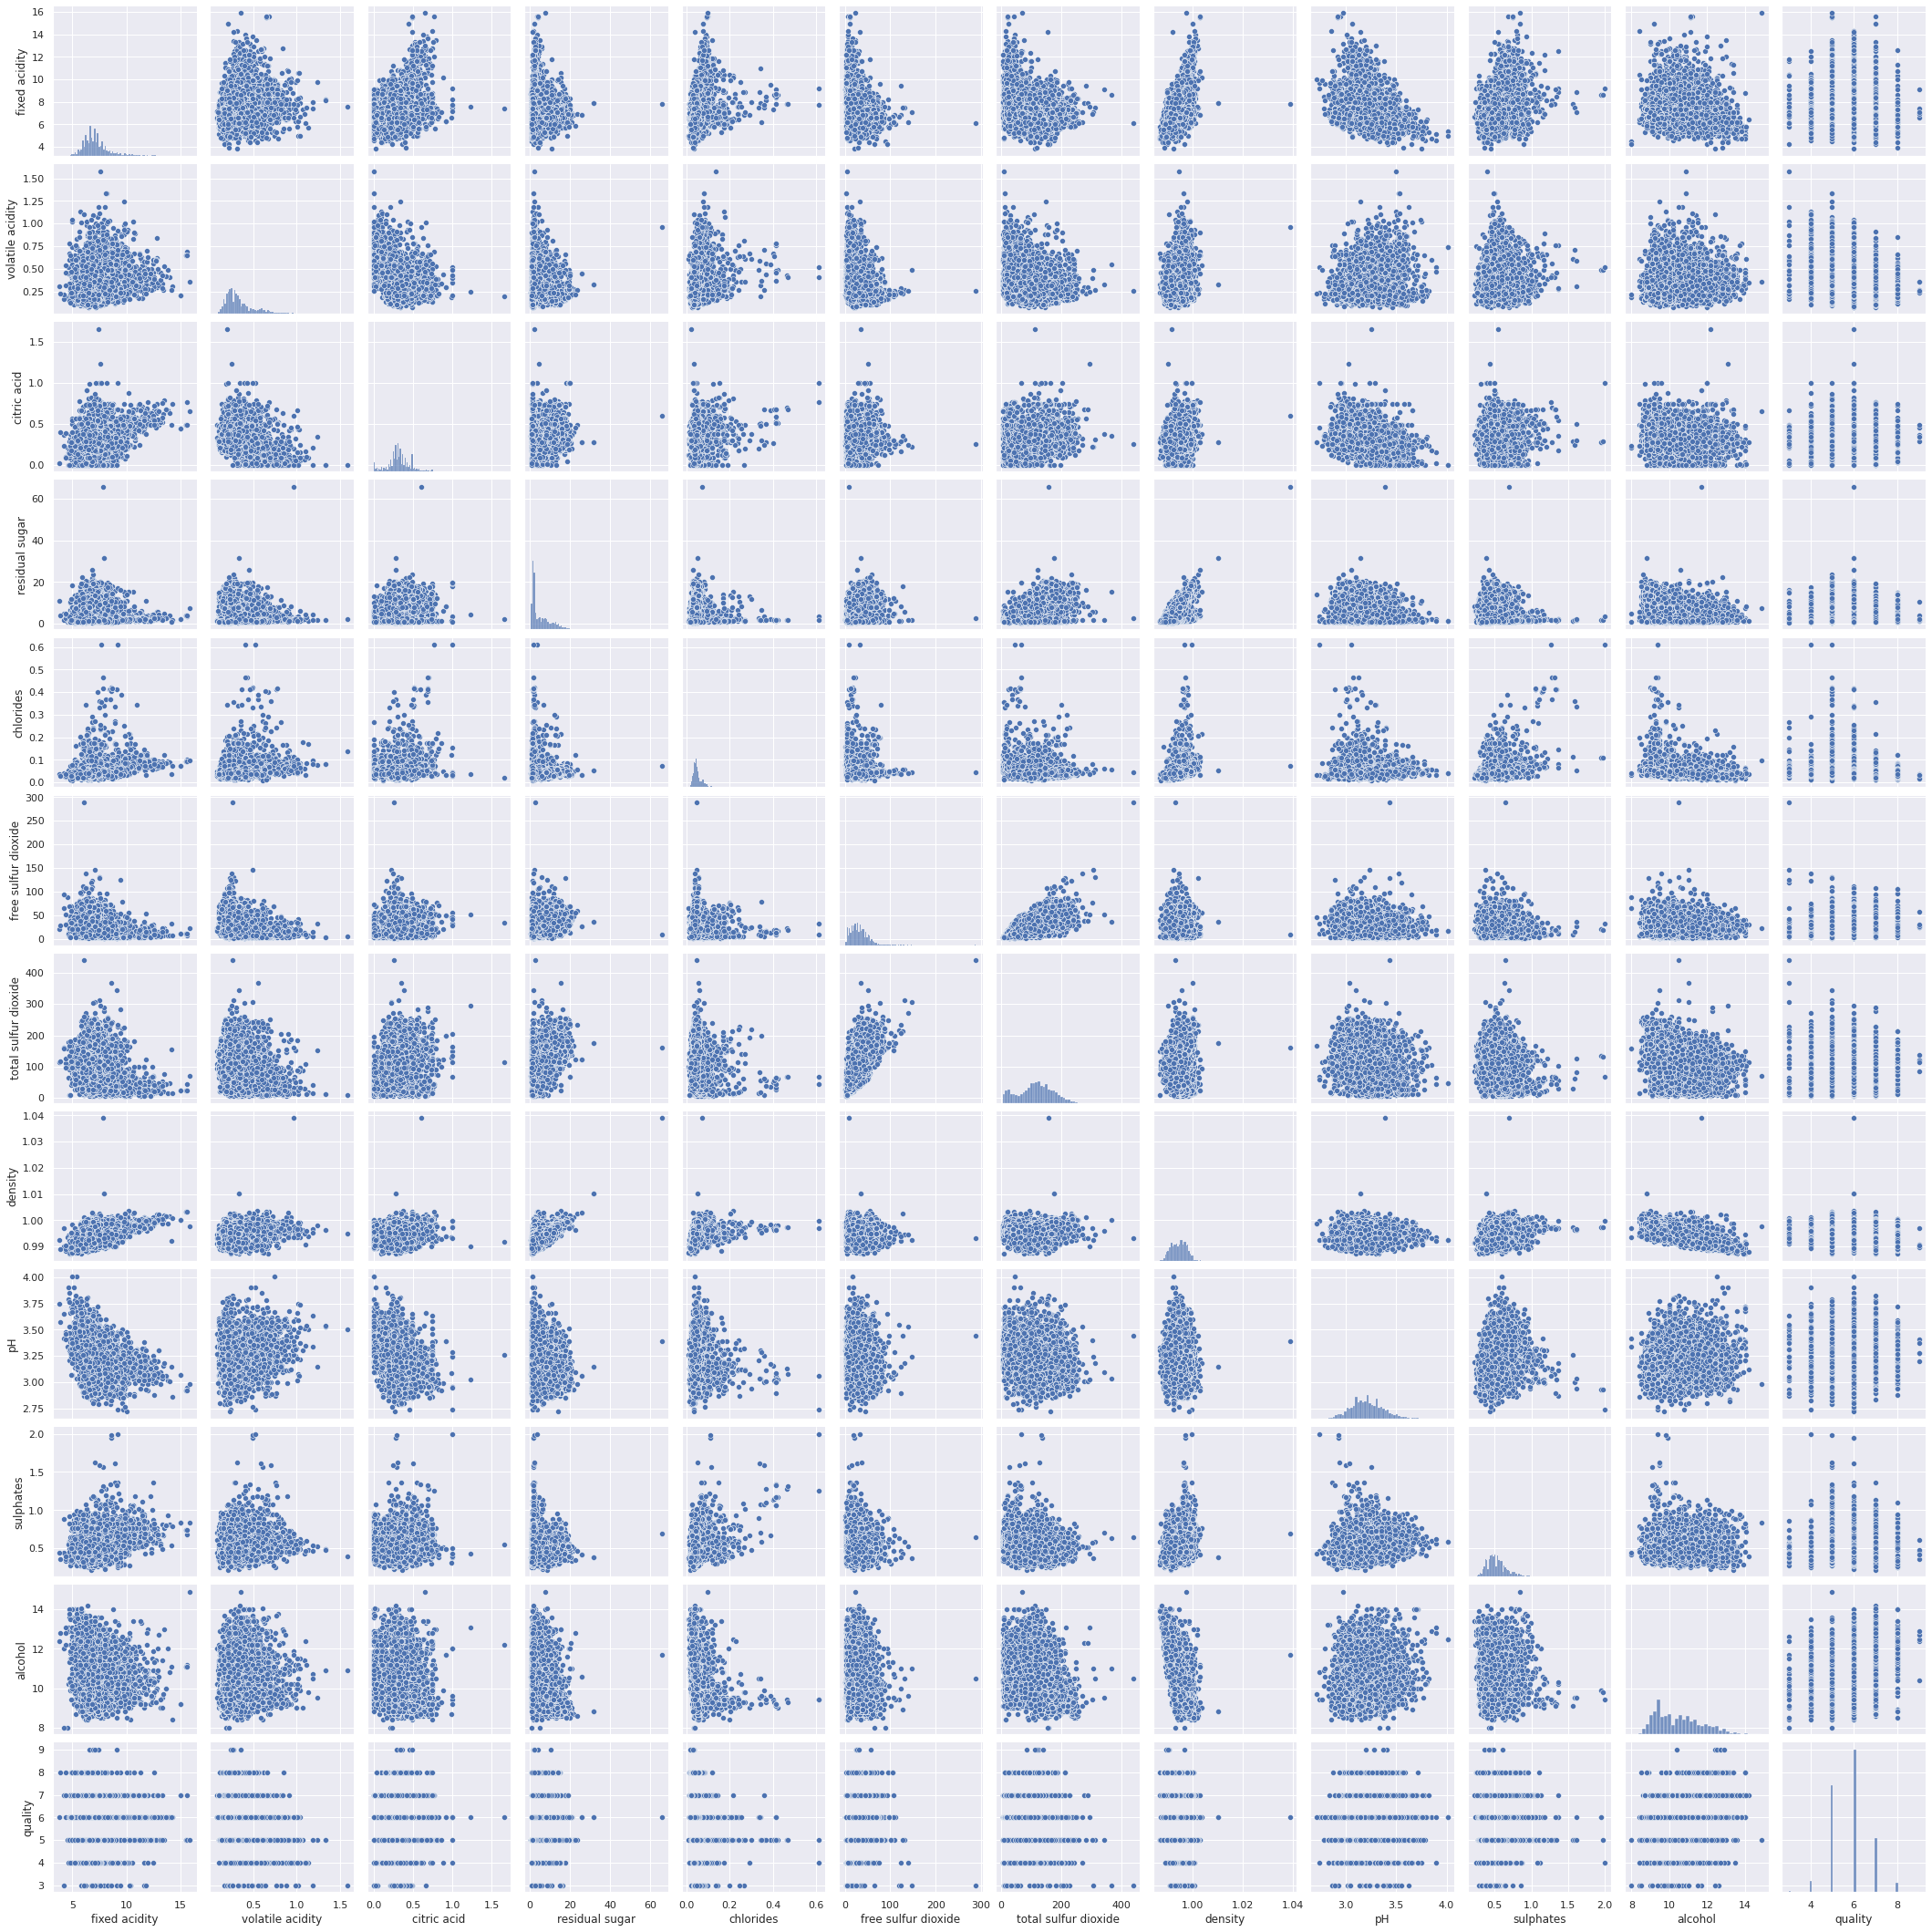

In [13]:
sns.pairplot(total_wine)

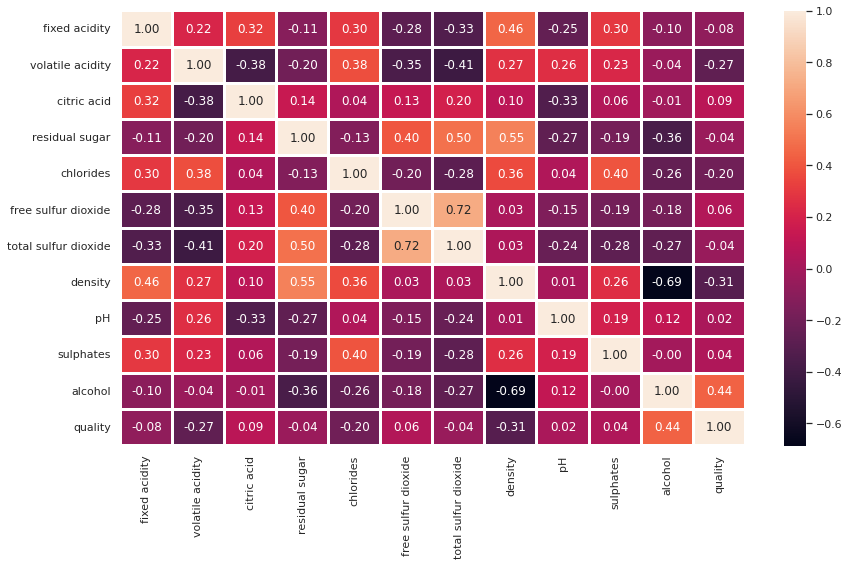

In [14]:
sns.heatmap(total_wine.corr(), annot=True, fmt='.2f', linewidths=2)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


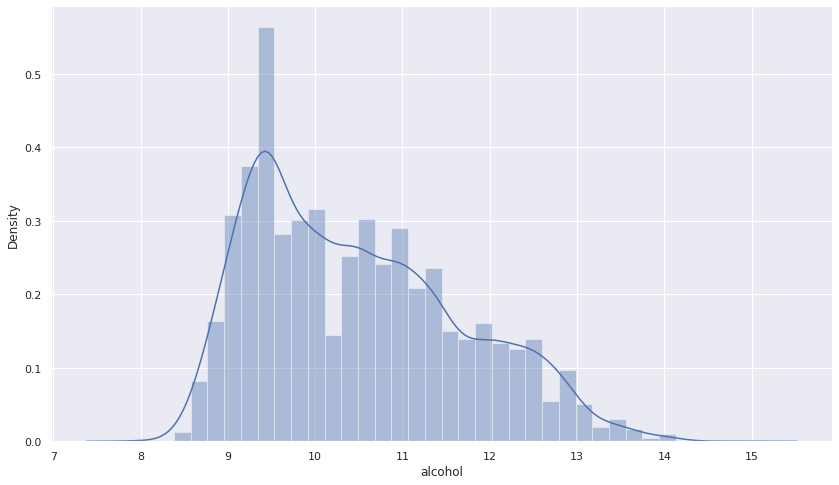

In [15]:
sns.distplot(total_wine['alcohol'])

In [16]:
from scipy.stats import skew 
skew(total_wine['alcohol'])

0.5655871101943215

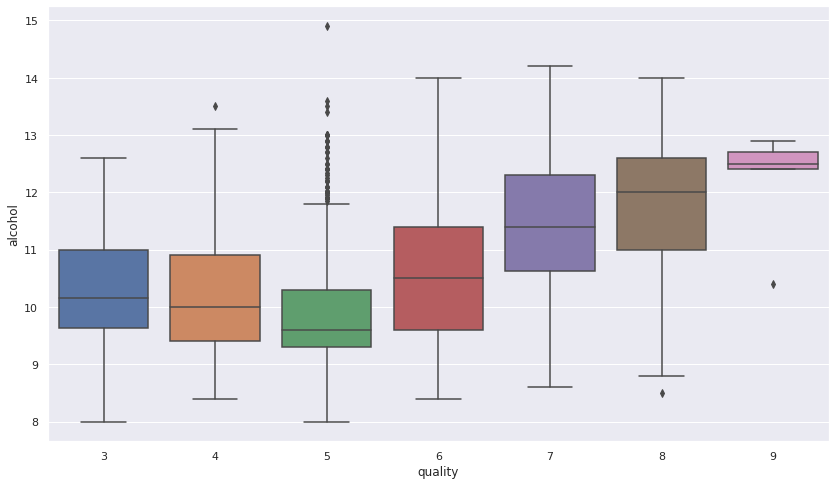

In [17]:
sns.boxplot(x='quality', y='alcohol', data = total_wine)

In [18]:
total_wine['quality_label'] =total_wine['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high') 
total_wine['quality_label'] =pd.Categorical(total_wine['quality_label'], categories=['low', 'medium', 'high'])

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

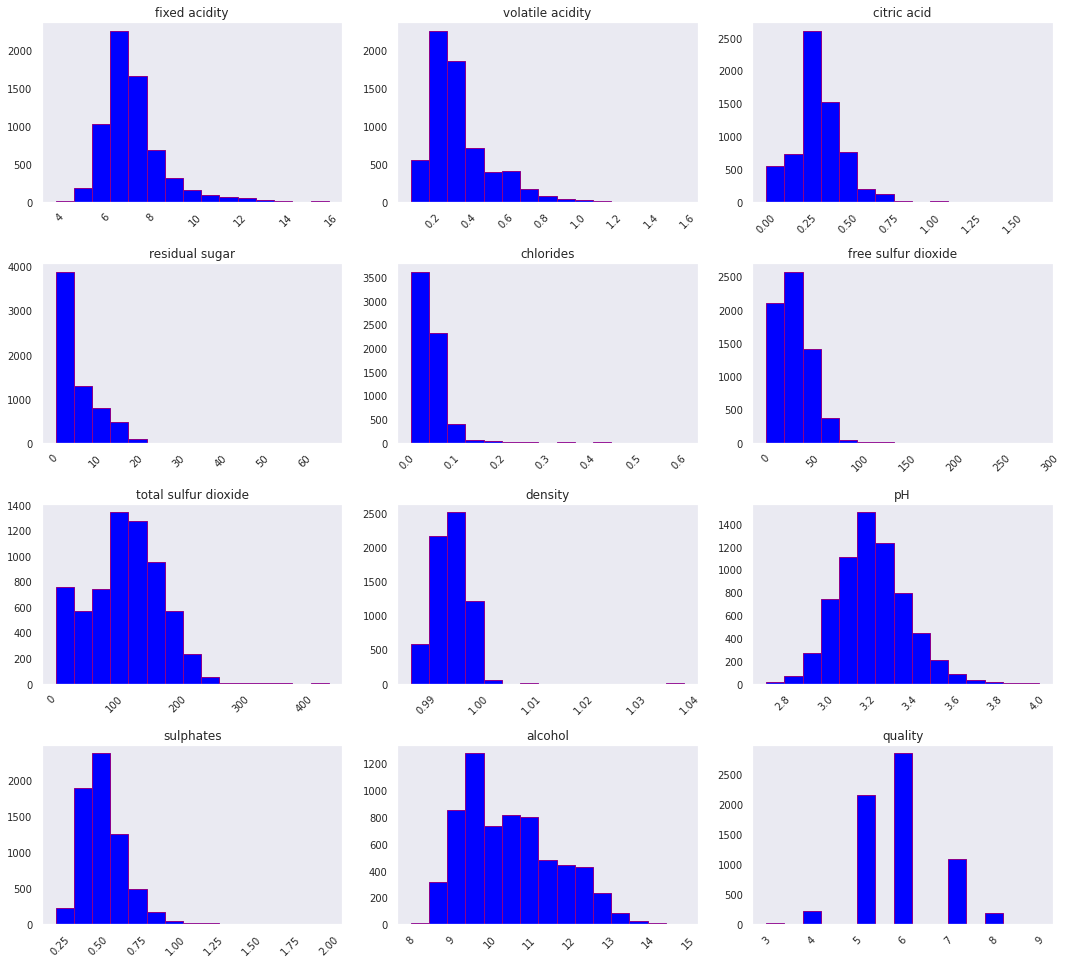

In [20]:
fig = total_wine.hist(bins=15, color='blue', edgecolor='darkmagenta', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

In [21]:
## Analisis de regresion from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [22]:
label_quality = LabelEncoder()
total_wine['quality_label'] = label_quality.fit_transform(total_wine['quality_label'])

In [23]:
total_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,2
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,2


In [24]:
total_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'category', 'quality_label'],
      dtype='object')

In [25]:
training_set_regresor=total_wine.drop(['category'],axis=1)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(training_set_regresor,total_wine['quality_label'],test_size=0.30,random_state=42)

In [27]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
3761,9.9,0.490,0.23,2.40,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,6,2
3740,7.7,0.280,0.35,15.30,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000,5,1
1359,11.6,0.475,0.40,1.40,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6,2
1230,7.7,0.180,0.34,2.70,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000,6,2
4751,7.6,0.250,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.200000,5,1
5191,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.700000,7,2
5226,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.500000,5,1
5390,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.500000,5,1


In [28]:
model_names=['KNearestNeighbors']

In [29]:
acc=[]
eval_acc={}
classification_model=KNeighborsClassifier()
classification_model.fit(x_train,y_train)
pred=classification_model.predict(x_test)
acc.append(accuracy_score(pred,y_test))
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc} 



In [30]:
eval_acc

{'Accuracy': [0.7476923076923077],
 'Modelling Algorithm': ['KNearestNeighbors']}